In [20]:
import numpy as np
import matplotlib.pyplot as plt

def LUT(A):
    (rows, columns) = A.shape

    # decompose inplace into LU matrix
    for row in range(rows-1):
        scalar = A[row+1, row] / A[row, row]
        A[row+1, row:columns] -= (A[row] * scalar)[row:columns]
        A[row+1, row] = scalar

    return A


def fbSubs(LU, b):
    (rows, columns) = LU.shape

    # solve LZ = b
    z = np.full(rows, 0, dtype=np.number)
    for row in range(rows):
        sub = np.dot(LU[row], z)
        z[row] = b[row] - sub

    # solve RX = Z
    x = np.full(rows, 0, dtype=np.number)
    for row in reversed(range(rows)):
        sub = np.dot(LU[row], x)
        x[row] = (z[row] - sub)/LU[row, row]

    return x

def randTrigonal(n):
    A = np.array( np.random.rand(n,n) )
    A = np.diag(np.diag(A, k=-1), k=-1) + np.diag(np.diag(A, k=0), k=0) + np.diag(np.diag(A, k=1), k=1)
    return A

def kth_diag_indices(a, k):
    rows, cols = np.diag_indices_from(a)
    if k < 0:
        return rows[-k:], cols[:k]
    elif k > 0:
        return rows[:-k], cols[k:]
    else:
        return rows, cols

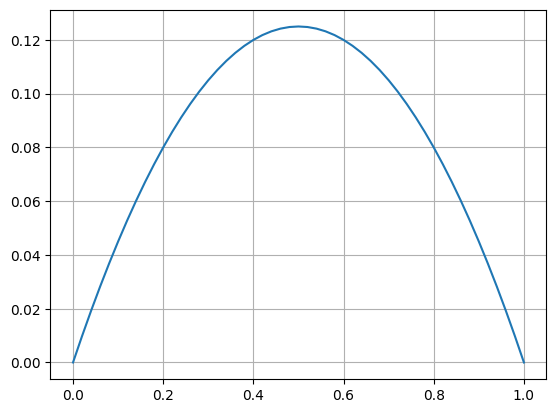

In [21]:
# solve of RWP
n = 50
x = np.linspace(0,1,n+1)

u0 = 0
un = 0

b = np.diff(x, axis = 0)**2 # h**2
b[0] += u0
b[-1] += un

# tridiagonale matrix
A = np.zeros((n-1,n-1))
A[kth_diag_indices(A, k=-1)] = -1
A[kth_diag_indices(A, k=0)] = 2
A[kth_diag_indices(A, k=1)] = -1

LU = LUT(A)
u = np.zeros((n+1))
u[0] = u0
u[-1] = un
u[1:-1] = fbSubs(LU, b) # numerical solution

plt.plot(x, u)
plt.grid()
plt.show()